In [2]:
#import libraries 
import matplotlib.pyplot as plt
from math import cos,pi
import cmath
from PIL import Image
import numpy as np
import random


In [3]:
F1 = 1/8
F2 = 1/32
MU = 1/10
SIGMA = 1/20

def get_r(F_val):
    r = np.zeros((256, 256))
    for i in range(256):
        A_i = np.random.normal(MU, SIGMA)
        phi_i = random.uniform(0, 2 * pi)
        for j in range(256):
            r[i,j] = A_i * cos(2 * pi * F_val * j + phi_i)
    return np.asarray(r)

def deteriorate_img(I, state):
    if (state == 0):
        return I
    elif (state == 1):
        r1 = get_r(F1)
        I1 = np.add(I, r1)
        return I1
    elif (state == 2):
        r2 = get_r(F2)
        I2 =  np.add(I, r2)
        return I2
    else:
        r12 = (np.add(get_r(F1), get_r(F2))) / 2
        I12 = np.add(I, r12)
    return I12


In [4]:
def img_deteriorate_print(image, deter_arr):
    I_state = [0, 1, 2, 12]
    I_title = ['Original Image I', 'Deteriorated Image I(1)',
             'Deteriorated Image I(2)', 'Deteriorated Image I(12)']
    plt.figure(figsize=(20,5))
    for i in range(1,5):
        det_img = deteriorate_img(image, I_state[i-1])
        norm_img = (det_img + abs(det_img.min())) / (det_img.max() + abs(det_img.min()))
        deter_arr.append(norm_img)
        plt.subplot(1,4,i)
        plt.imshow(deter_arr[i-1],cmap="gray")
        plt.title(I_title[i-1])
    plt.show()
    return deter_arr

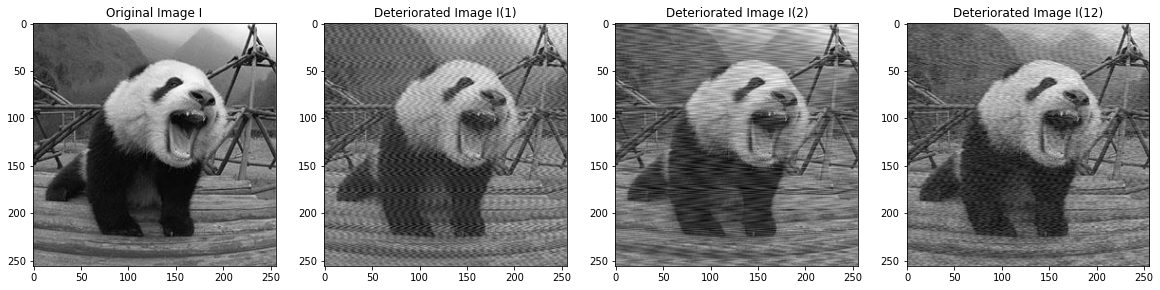

In [5]:
img = np.array(Image.open("/content/panda_gray_image.png").convert('L'))/255
det_array = []
images = img_deteriorate_print(img, det_array)

In [6]:
def DFT(n):
    dft_mat=np.zeros((n,n),complex)
    for i in range(n):
        for j in range(n):
            dft_mat[i][j]=np.exp(-2*np.pi*i*j*1j/n)/np.sqrt(n)
    return dft_mat

In [7]:
def INVDFT(n):
    inv_dft_mat=np.zeros((n,n),complex)
    for i in range(n):
        for j in range(n):
            inv_dft_mat[i][j]=np.exp(2*np.pi*i*j*1j/n)/np.sqrt(n)
    return inv_dft_mat

In [18]:
img_dft=DFT(len(img))
img_inv_dft=INVDFT(len(img))
img0=images[0]
img1=images[1]
img2=images[2]
img12=images[3]

In [17]:
img0mult=(img_dft@np.transpose(img1))
img1mult=(img_dft@np.transpose(img1))
img2mult=(img_dft@np.transpose(img2))
img12mult=(img_dft@np.transpose(img12))

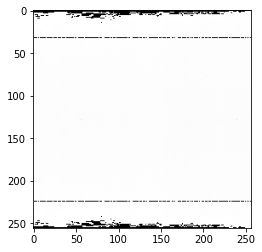

In [19]:
_=plt.imshow(np.log(abs((img0mult))).astype(np.uint8),cmap="gray")

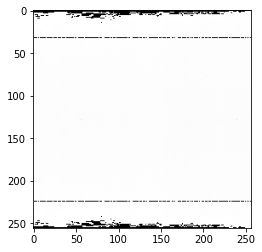

In [10]:
_=plt.imshow(np.log(abs((img1mult))).astype(np.uint8),cmap="gray")

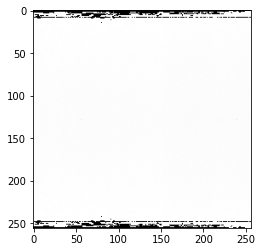

In [11]:
_=plt.imshow(np.log(abs((img2mult))).astype(np.uint8),cmap="gray")

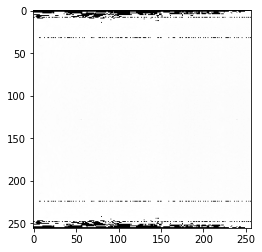

In [12]:
_=plt.imshow(np.log(abs((img12mult))).astype(np.uint8),cmap="gray")

In [13]:
def recon_by_fval(img,fval):
    recon_tmp = img

    recon_tmp[256-int(1/fval)] = 0
    recon_tmp[0+int(1/fval)] = 0

    recon= np.transpose(np.dot(img_inv_dft,recon_tmp))
    return np.abs(recon)

In [22]:
def get_mse(image_1, image_2):
    mse = 0
    for i in range(image_1.shape[0]):
        for j in range(image_1.shape[1]):
            mse += np.power(image_1[i][j] - image_2[i][j], 2)
    mse /= (image_1.shape[0] * image_2.shape[1])
    return mse

mse for I(1) is:  0.005452320475750745


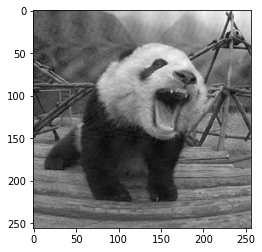

In [27]:
I1_fixed = recon_by_fval(img1mult,F1)
_=plt.imshow(I1_fixed, cmap='gray')
print('mse for I(1) is: ', get_mse(images[0], I1_fixed))

mse for I(2) is:  0.005028992570607975


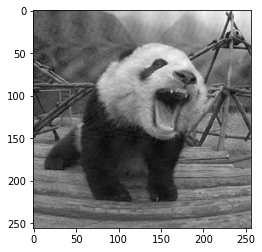

In [28]:
I2_fixed = recon_by_fval(img2mult,F2)
_=plt.imshow(I2_fixed, cmap='gray')
print('mse for I(2) is: ', get_mse(images[0], I2_fixed))

mse for I(2) is:  (0.003421666142686828+7.293249631046344e-18j)


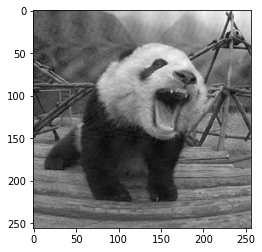

In [29]:
recon_tmp = img12mult

recon_tmp[256-int(1/F2)] = 0
recon_tmp[0+int(1/F2)] =0
recon_tmp[256-int(1/F1)] = 0
recon_tmp[0+int(1/F1)] = 0

recon3= np.transpose(np.dot(img_inv_dft,recon_tmp))
_=plt.imshow(np.abs(recon3), cmap='gray')
print('mse for I(2) is: ', get_mse(images[0], recon3))